In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import src.data_handler as data_handler
import src.models as models
import os
from IPython.display import display

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
np.random.seed(42)

In [2]:
clustering_df : pd.DataFrame = pd.read_csv(f"{project_root}/TP04/data/raw/clustering.csv").drop(columns=['index'])
clustering_df.info()
clustering_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       4999 non-null   int64
 1   B       4999 non-null   int64
dtypes: int64(2)
memory usage: 78.2 KB


,A,B
0,812954,643720
1,868217,609046
2,920248,607272
3,841621,639394
4,843907,598777


In [3]:
# clustering_normalized_df : pd.DataFrame = clustering_df / clustering_df.max()
# clustering_normalized_df.info()
# clustering_normalized_df.head()
# clustering_normalized_df.to_csv(f"{project_root}/TP04/data/processed/clustering_normalized.csv")

In [4]:
X : np.ndarray = clustering_df.to_numpy()
k_means_01 : models.KMeans = models.KMeans(X, 20)
k_means_01.fit_centroids(print_iterations=True)
print("")
print("CENTROIDES")
for c, i in zip(k_means_01.mu, range(1, len(k_means_01.mu) + 1)):
    print(f"Cluster = {i:02d} | A: {c[0]}, B: {c[1]}")

done at iteration  15

CENTROIDES
Cluster = 01 | A: 276307, B: 750552
Cluster = 02 | A: 404784, B: 156110
Cluster = 03 | A: 343786, B: 190675
Cluster = 04 | A: 678954, B: 149574
Cluster = 05 | A: 534789, B: 889914
Cluster = 06 | A: 176515, B: 236939
Cluster = 07 | A: 360916, B: 399395
Cluster = 08 | A: 454516, B: 348822
Cluster = 09 | A: 743011, B: 489570
Cluster = 10 | A: 445036, B: 610852
Cluster = 11 | A: 225449, B: 718363
Cluster = 12 | A: 809538, B: 797406
Cluster = 13 | A: 836493, B: 636549
Cluster = 14 | A: 550270, B: 436185
Cluster = 15 | A: 485885, B: 830683
Cluster = 16 | A: 119591, B: 243004
Cluster = 17 | A: 198591, B: 478248
Cluster = 18 | A: 808125, B: 234833
Cluster = 19 | A: 634118, B: 716441
Cluster = 20 | A: 570000, B: 241011


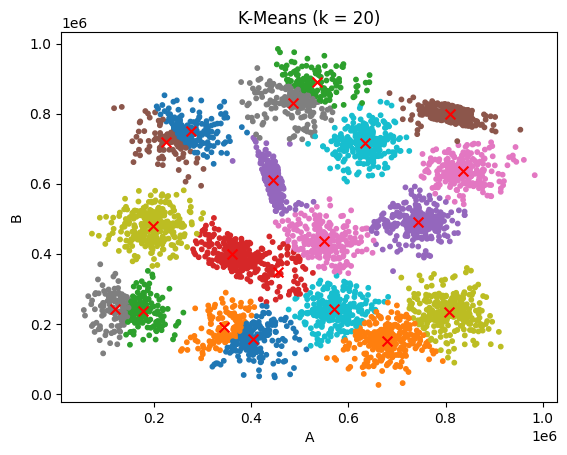

In [5]:
k_means_01.plot_clusters_2d()

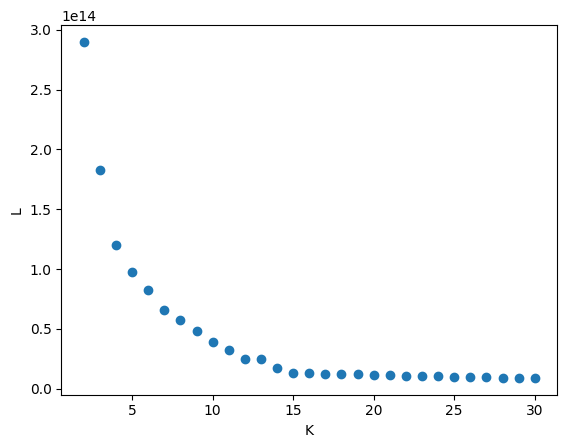

In [6]:
k_max : int = 30
k_model : models.KMeans
losses_k : list[float] = []
valores_k : list[int] = list(range(2, k_max+1))
for k in range(2, k_max + 1):
    k_model = models.KMeans(X, k)
    k_model.fit_centroids(runs=5)
    losses_k.append(k_model.calculate_distance_squared_error())
plt.scatter(range(2, k_max+1), losses_k)
plt.xlabel("K")
plt.ylabel("L")
plt.show()

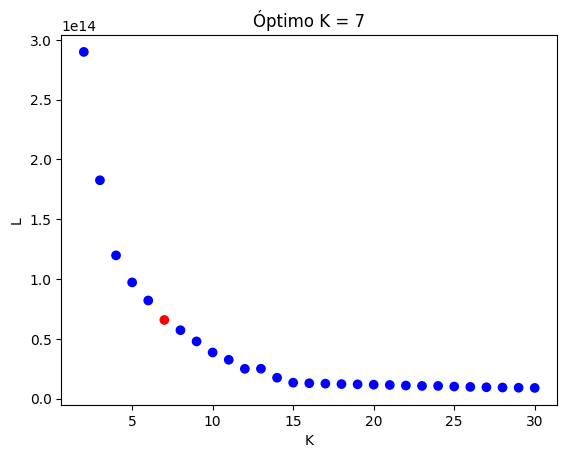

In [7]:
valores_k_np = np.array(valores_k)
losses_k_np = np.array(losses_k)

p1 = np.array([valores_k_np[0], losses_k_np[0]])
p2 = np.array([valores_k_np[-1], losses_k_np[-1]])
line_vec = p2 - p1
line_vec_norm = line_vec / np.linalg.norm(line_vec)

def distance_to_line(p):
    vec = p - p1
    proj = np.dot(vec, line_vec_norm) * line_vec_norm
    return np.linalg.norm(vec - proj)

distances = np.array([distance_to_line(np.array([valores_k_np[i], losses_k_np[i]])) for i in range(len(valores_k_np))])
k_opt = valores_k_np[np.argmax(distances)]

colors : list[float] = ['red' if k == k_opt else 'blue' for k in valores_k_np]

plt.scatter(valores_k_np, losses_k_np, c=colors)
plt.xlabel("K")
plt.ylabel("L")
plt.title(f"Óptimo K = {k_opt}")
plt.show()


In [ ]:
X: np.ndarray = clustering_df.to_numpy()
gmm_model = models.GMM(X, 10)
mu, cov, coef = gmm_model.fit_gaussians(runs=10)
print("\nCENTROIDES")
for c, i in zip(mu, range(1, len(mu) + 1)):
    print(f"Cluster = {i:02d} | A: {c[0]}, B: {c[1]}")


CENTROIDES
Cluster = 01 | A: 596054, B: 200207
Cluster = 02 | A: 549565, B: 439510
Cluster = 03 | A: 444199, B: 611482
Cluster = 04 | A: 261575, B: 742629
Cluster = 05 | A: 577089, B: 777760
Cluster = 06 | A: 177110, B: 375271
Cluster = 07 | A: 823098, B: 725752


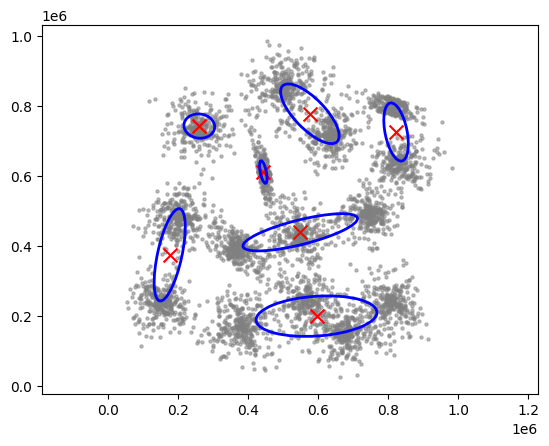

In [9]:
gmm_model.plot_gmm()